 you can use (mean + 3sigma) and (mean - 3sigma) for finding outliers.

z-score formula : xi = (xi-mean)/sigma

two types for performing outliers 

if data is minimum u can use trimming whch means remove it

if data is more u can use capping which means if data is more than max(3) value it becomes x=3 and if it less same

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("placements.csv")
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


In [3]:
df.shape

(1000, 3)

<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

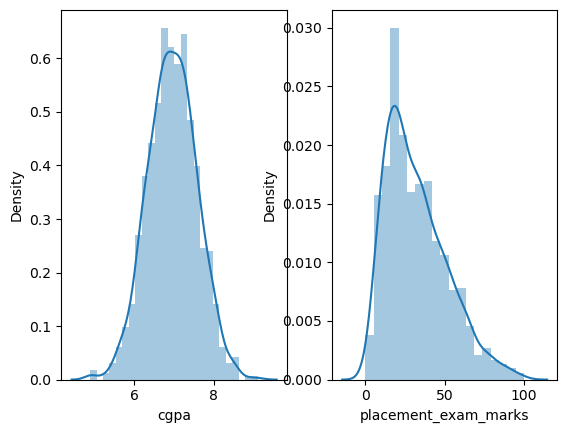

In [4]:
plt.subplot(121)
sns.distplot(df['cgpa'])

plt.subplot(122)
sns.distplot(df['placement_exam_marks'])

In [5]:
df['cgpa'].mean()

6.96124000000001

In [6]:
df['cgpa'].std()

0.6158978751323894

In [7]:
df['cgpa'].min()

4.89

In [8]:
df['cgpa'].max()

9.12

In [9]:
print("Highest is ",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest is ",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest is  8.808933625397177
Lowest is  5.113546374602842


In [10]:
df[(df['cgpa']>8.80) | (df['cgpa']<5.11)]  # Outliers

,cgpa,placement_exam_marks,placed
485,4.92,44,1
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
999,4.90,10,1


# Trimming

In [11]:
new_df=df[(df['cgpa']<8.80) & (df['cgpa']>5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
991,7.04,57,0
992,6.26,12,0
993,6.73,21,1
994,6.48,63,0


#  Z-score  

In [12]:
df['cgpa_zscore']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()

In [13]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26,1,0.371425
1,7.46,38,1,0.809810
2,7.54,40,1,0.939701
3,6.42,8,1,-0.878782
4,7.23,17,0,0.436371


In [14]:
df[df['cgpa_zscore']>3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44,1,3.099150
996,9.12,65,1,3.505062


In [15]:
df[df['cgpa_zscore']<-3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44,1,-3.314251
997,4.89,34,0,-3.362960
999,4.90,10,1,-3.346724


In [16]:
new_df=df[(df['cgpa_zscore']<3) & (df['cgpa_zscore']>-3)]
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26,1,0.371425
1,7.46,38,1,0.809810
2,7.54,40,1,0.939701
3,6.42,8,1,-0.878782
4,7.23,17,0,0.436371
...,...,...,...,...
991,7.04,57,0,0.127878
992,6.26,12,0,-1.138565
993,6.73,21,1,-0.375452
994,6.48,63,0,-0.781363


# Capping

In [17]:
upper_limit=df['cgpa'].mean()+ 3*df['cgpa'].std()
lower_limit=df['cgpa'].mean() - 3*df['cgpa'].std()
lower_limit, upper_limit

(5.113546374602842, 8.808933625397177)

In [18]:
df['cgpa']=np.where(df['cgpa']>upper_limit,
                    upper_limit,
                    np.where(df['cgpa']<lower_limit,
                             lower_limit,
                             df['cgpa']))

In [19]:
df.shape

(1000, 4)

In [20]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64